In [1]:
using MCHMC

[ Info: Precompiling MCHMC [92da4d09-9da0-4f8a-8b31-da41ef0ab6ee]


In [2]:
target = StandardGaussianTarget(; d=1000)

StandardGaussianTarget(1000, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], MCHMC.var"#nlogp#5"(), MCHMC.var"#grad_nlogp#6"{MCHMC.var"#nlogp#5"}(MCHMC.var"#nlogp#5"()), MCHMC.var"#transform#7"(), MCHMC.var"#prior_draw#8"{Int64}(1000))

In [3]:
eps=46.29590735246731
L=21.807931325769687
settings = Settings(eps, L; integrator="MN")

Settings(Random.MersenneTwister(0), 0.1931833275037836, 46.29590735246731, 21.807931325769687, "MN")

In [4]:
sampler = Sampler(settings, target)

Sampler(Settings(Random.MersenneTwister(0), 0.1931833275037836, 46.29590735246731, 21.807931325769687, "MN"), StandardGaussianTarget(1000, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], MCHMC.var"#nlogp#5"(), MCHMC.var"#grad_nlogp#6"{MCHMC.var"#nlogp#5"}(MCHMC.var"#nlogp#5"()), MCHMC.var"#transform#7"(), MCHMC.var"#prior_draw#8"{Int64}(1000)), MCHMC.Minimal_norm, Hyperparameters(21.807931325769687, 46.29590735246731, 0.2623177964761677))

In [5]:
function Leapfrog2(sampler::Sampler, x, g, u)
    sett = sampler.settings
    target = sampler.target

    uu = MCHMC.Update_momentum(sampler, sett.eps * 0.5, g, u)
    println(uu)

    #full step in x
    xx = x .+ sett.eps .* uu
    println(xx)
    gg = target.grad_nlogp(xx) .* target.d ./ (target.d - 1)

    #half step in momentum
    uu = MCHMC.Update_momentum(sampler, sett.eps * 0.5, gg, uu)

    return xx, gg, uu
end

Leapfrog2 (generic function with 1 method)

In [6]:
Leapfrog2(sampler, [0.1], [0.1], [0.1])

[0.09770782608873095]
[4.623472464214876]


([4.623472464214876], [4.628100564779656], [-0.009110253066119494])

In [7]:
samples = Sample(sampler; num_steps=5000);

In [8]:
using PyPlot

In [9]:
t = LinRange(-4.0, 4, 100)
x1 = [x[1] for x in samples];

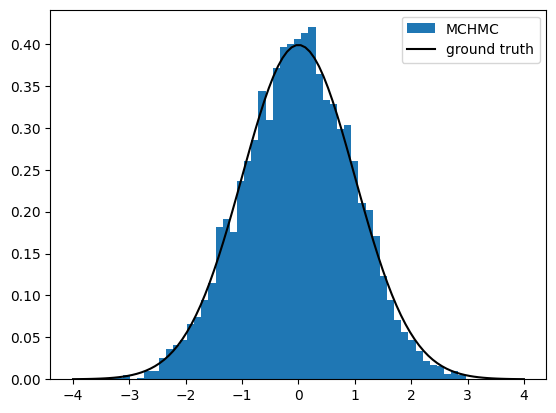

PyObject <matplotlib.legend.Legend object at 0x7f9e44883670>

In [10]:
plt.hist(x1, bins = 50, density = true, label = "MCHMC")
plt.plot(t, 1/(sqrt(2*pi)) .* exp.(-0.5 .* t.^2), color = "black", label = "ground truth")
plt.legend()